 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df.sample(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2017-12-20,-0.003890,-0.001558,-0.010256,0.000854
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2016-09-09,-0.016075,-0.012261,-0.032441,-0.017431
2017-02-03,-0.001004,0.003698,0.008352,0.007040
2016-08-03,0.005437,0.012794,-0.000365,0.003224


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()

In [5]:
#Validated that 100% of null records were dropped from data
whale_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_path = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_df.sample(5)

,Algo 1,Algo 2
Date,,
2017-04-17,0.008784,0.006105
2019-04-02,0.003776,-0.000413
2015-07-23,-0.000997,-0.007481
2015-11-23,0.012757,0.002214
2017-01-27,0.000637,0.000276


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df = algo_df.dropna()

In [9]:
#Validated that 100% of null records were dropped from data
algo_df.isnull().mean() * 100

Algo 1    0.0
Algo 2    0.0
dtype: float64

In [10]:
# Rewrite column names to align with other data headers
algo_col_header = ['ALGO 1','ALGO 2']
algo_df.columns = algo_col_header
algo_df

,ALGO 1,ALGO 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_path = ('Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head(5)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [12]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "",regex=True)
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [15]:
# Drop nulls
sp500_df = sp500_df.dropna()
sp500_df.isnull().mean() * 100

Close    0.0
dtype: float64

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_col_header = ['S&P 500 INDEX']
sp500_df.columns = sp500_col_header
sp500_df.head()

,S&P 500 INDEX
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
combined_data.sort_index(inplace=True)
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,S&P 500 INDEX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Combined Daily Returns'}, xlabel='Date'>

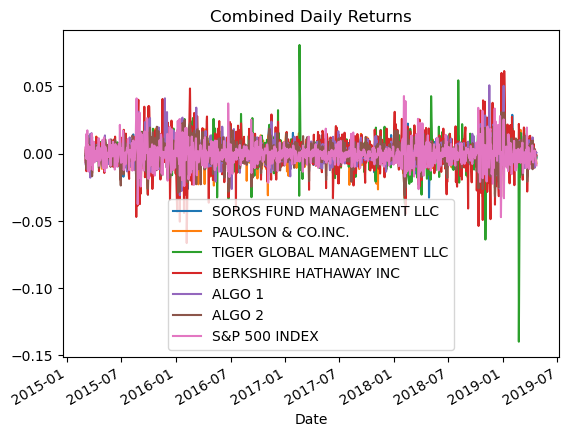

In [18]:
# Plot daily returns of all portfolios
combined_data.plot(title="Combined Daily Returns")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Combined Cumulative Returns'}>

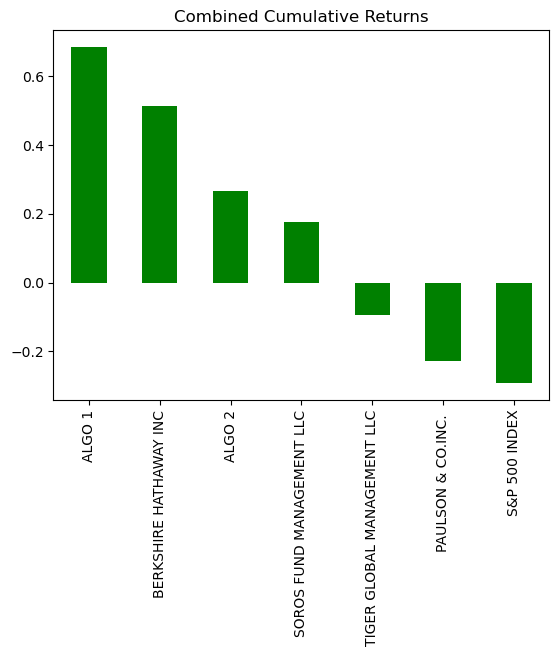

In [19]:
# Calculate cumulative returns of all portfolios
cumulalitve_returns = combined_data.sum().sort_values(ascending=False)

# Plot cumulative returns
cumulalitve_returns.plot.bar(title="Combined Cumulative Returns", color="green")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Plot of Daily Returns'}>

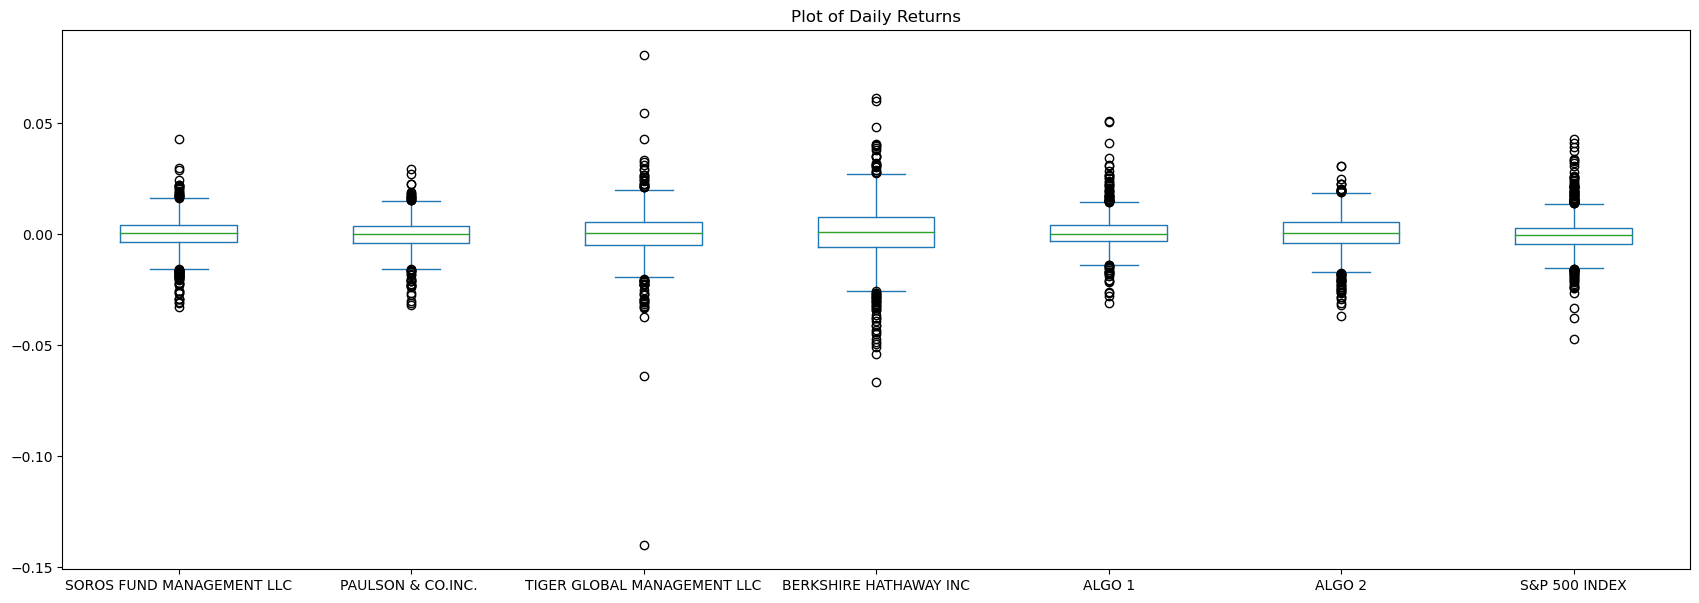

In [20]:
# Box plot to visually show risk
combined_data.plot.box(subplots=False, title="Plot of Daily Returns",figsize=(21, 7))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
combined_data_std = combined_data.std().sort_values(ascending=False)
combined_data_std.head(10)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500 INDEX                  0.008587
ALGO 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
ALGO 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_df.std()
y=combined_data_std['S&P 500 INDEX']
risky_business =[]
# Determine which portfolios are riskier than the S&P 500
for x in combined_data_std:
    if x > y:
        risky_business.append(x)
        
print(risky_business)
print()
#Sorted the list to identify this information. Berkshire Hathaway Inc and Tiger Global Management LLC are the more riskier than the S&P 
combined_data_std.head(2)

[0.012918753062201797, 0.010897305414583355]



BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
dtype: float64

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
combined_data_annualized_std = combined_data_std * np.sqrt(252)
combined_data_annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500 INDEX                  0.136313
ALGO 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
ALGO 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Daily Returns - Standard Deviation Rolling 21-days'}, xlabel='Date', ylabel='Standard Deviation'>

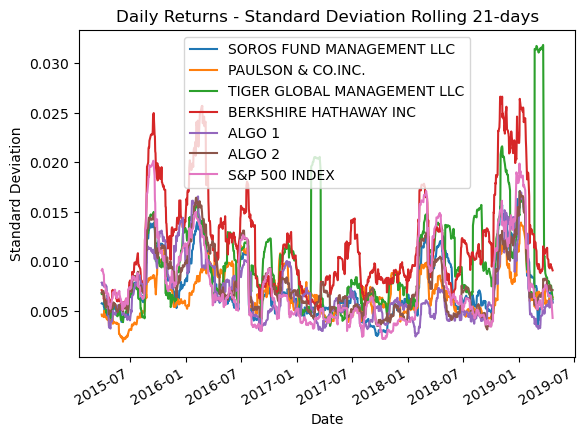

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_data_std_roll21 = combined_data.rolling(window=21).std()
# Plot the rolling standard deviation
combined_data_std_roll21.plot(title='Daily Returns - Standard Deviation Rolling 21-days', xlabel='Date', ylabel="Standard Deviation")

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
combined_data_correlation = combined_data.corr()
# Display the correlation matrix
combined_data_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,S&P 500 INDEX
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
ALGO 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
ALGO 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500 INDEX,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 30-day Beta of ALGO 1'}, xlabel='Date'>

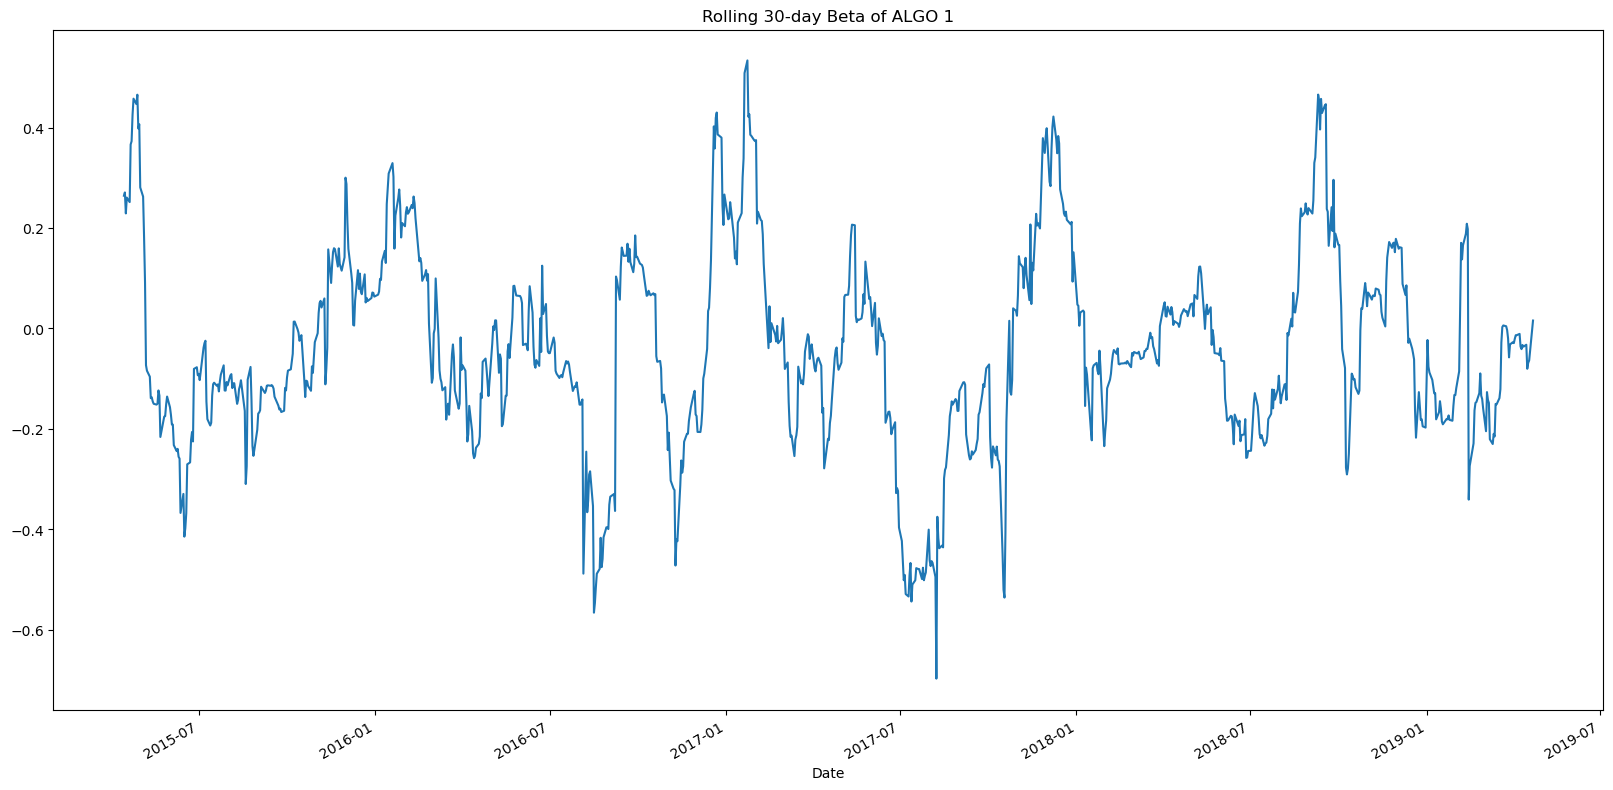

In [26]:
# Calculate covariance of a single portfolio
covariance = combined_data['ALGO 1'].cov(combined_data['S&P 500 INDEX'])

# Calculate variance of S&P 500
variance = combined_data['S&P 500 INDEX'].var()

# Computing beta
algo1_beta = covariance / variance

# Plot beta trend
rolling_covariance = combined_data['ALGO 1'].rolling(window=30).cov(combined_data['S&P 500 INDEX'])
rolling_variance = combined_data['S&P 500 INDEX'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title='Rolling 30-day Beta of ALGO 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [27]:
# Use `ewm` to calculate the rolling window
combined_data_ewm = combined_data_std.ewm(halflife=21).mean()
combined_data_ewm

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.011891
S&P 500 INDEX                  0.010753
ALGO 2                         0.010120
SOROS FUND MANAGEMENT LLC      0.009645
ALGO 1                         0.009280
PAULSON & CO.INC.              0.008925
dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_data.mean()-combined_data['S&P 500 INDEX'].mean()) * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios_sorted = sharpe_ratios.sort_values(ascending=False)
sharpe_ratios_sorted

ALGO 1                         1.953767
ALGO 2                         1.018189
BERKSHIRE HATHAWAY INC         0.951436
SOROS FUND MANAGEMENT LLC      0.906838
TIGER GLOBAL MANAGEMENT LLC    0.278448
PAULSON & CO.INC.              0.142411
S&P 500 INDEX                  0.000000
dtype: float64

<Axes: title={'center': 'Sharpe Ratio'}>

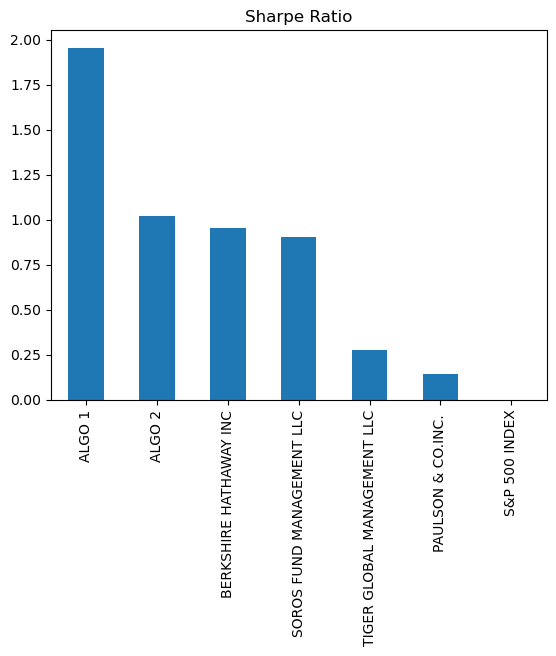

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_sorted.plot(kind="bar", title="Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 and Algo 2 both outperformed the S&P 500 Index and majority of the Whale's in the Whale portfolio. Algo 1 performed the best out of the Algo portfolios. Out of the Whales, Bershire Hathway performed the best when compared to the leading Algo portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [82]:
# Reading data from 1st stock - 
#AMZN
amzn_path = Path('Resources/amzn_stock_data.csv')
amzn_df = pd.read_csv(amzn_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
amzn_col_header = ['AMZN']
amzn_df.columns = amzn_col_header

amzn_df.head(5)

,AMZN
Date,
2022-01-03 16:00:00,170.40
2022-01-04 16:00:00,167.52
2022-01-05 16:00:00,164.36
2022-01-06 16:00:00,163.25
2022-01-07 16:00:00,162.55


In [83]:
# Reading data from 2nd stock
#MSFT
msft_path = Path('Resources/msft_stock_data.csv')
msft_df = pd.read_csv(msft_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
msft_col_header = ['MSFT']
msft_df.columns = msft_col_header

msft_df.head(5)

,MSFT
Date,
2022-01-03 16:00:00,334.75
2022-01-04 16:00:00,329.01
2022-01-05 16:00:00,316.38
2022-01-06 16:00:00,313.88
2022-01-07 16:00:00,314.04


In [84]:
# Reading data from 3rd stock
#SPY
spy_path = Path('Resources/spy_stock_data.csv')
spy_df = pd.read_csv(spy_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
spy_col_header = ['SPY']
spy_df.columns = spy_col_header

spy_df.head(5)

,SPY
Date,
2022-01-03 16:00:00,477.71
2022-01-04 16:00:00,477.55
2022-01-05 16:00:00,468.38
2022-01-06 16:00:00,467.94
2022-01-07 16:00:00,466.09


In [85]:
# Reading data from 4th stock
#GOOGL
googl_path = Path('Resources/googl_stock_data.csv')
googl_df = pd.read_csv(googl_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
googl_col_header = ['GOOGL']
googl_df.columns = googl_col_header

googl_df.head(5)

,GOOGL
Date,
2022-01-03 16:00:00,144.99
2022-01-04 16:00:00,144.40
2022-01-05 16:00:00,137.78
2022-01-06 16:00:00,137.75
2022-01-07 16:00:00,137.02


In [86]:
# Reading data from 5th stock
#AAPL
aapl_path = Path('Resources/aapl_stock_data.csv')
aapl_df = pd.read_csv(aapl_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
aapl_col_header = ['AAPL']
aapl_df.columns = aapl_col_header


aapl_df.head(5)

,AAPL
Date,
2022-01-03 16:00:00,182.01
2022-01-04 16:00:00,179.70
2022-01-05 16:00:00,174.92
2022-01-06 16:00:00,172.00
2022-01-07 16:00:00,172.17


In [87]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([amzn_df, msft_df, spy_df, googl_df, aapl_df], axis="columns", join="inner")
combined_stocks.head()

,AMZN,MSFT,SPY,GOOGL,AAPL
Date,,,,,
2022-01-03 16:00:00,170.40,334.75,477.71,144.99,182.01
2022-01-04 16:00:00,167.52,329.01,477.55,144.40,179.70
2022-01-05 16:00:00,164.36,316.38,468.38,137.78,174.92
2022-01-06 16:00:00,163.25,313.88,467.94,137.75,172.00
2022-01-07 16:00:00,162.55,314.04,466.09,137.02,172.17


In [88]:
# Reset Date index
combined_stocks.sort_index(inplace=True, ascending=True)

In [89]:
# Reorganize portfolio data by having a column per symbol
combined_stocks.head()

,AMZN,MSFT,SPY,GOOGL,AAPL
Date,,,,,
2022-01-03 16:00:00,170.40,334.75,477.71,144.99,182.01
2022-01-04 16:00:00,167.52,329.01,477.55,144.40,179.70
2022-01-05 16:00:00,164.36,316.38,468.38,137.78,174.92
2022-01-06 16:00:00,163.25,313.88,467.94,137.75,172.00
2022-01-07 16:00:00,162.55,314.04,466.09,137.02,172.17


In [94]:
# Calculate daily returns
daily_returns = combined_stocks.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.sample(5)

,AMZN,MSFT,SPY,GOOGL,AAPL
Date,,,,,
2022-07-19 16:00:00,0.039117,0.020767,0.027019,0.043841,0.026722
2022-12-23 16:00:00,0.017425,0.002267,0.005752,0.016750,-0.002798
2022-04-01 16:00:00,0.003436,0.003600,0.002834,0.007766,-0.001718
2022-04-27 16:00:00,-0.008752,0.048109,0.002812,-0.036747,-0.001467
2022-02-24 16:00:00,0.045087,0.051094,0.015049,0.039972,0.016680


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [100]:
# Set weights
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2022-01-04 16:00:00   -0.010229
2022-01-05 16:00:00   -0.029780
2022-01-06 16:00:00   -0.006501
2022-01-07 16:00:00   -0.002409
2022-01-10 16:00:00    0.001025
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [105]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio = pd.concat([daily_returns,portfolio_returns], axis="columns", join="inner")
combined_portfolio.columns = ['AMZN', 'MSFT', 'SPY', 'GOOGL', 'AAPL','My Portfolio']
combined_portfolio.head()

,AMZN,MSFT,SPY,GOOGL,AAPL,My Portfolio
Date,,,,,,
2022-01-04 16:00:00,-0.016901,-0.017147,-0.000335,-0.004069,-0.012692,-0.010229
2022-01-05 16:00:00,-0.018863,-0.038388,-0.019202,-0.045845,-0.026600,-0.029780
2022-01-06 16:00:00,-0.006753,-0.007902,-0.000939,-0.000218,-0.016693,-0.006501
2022-01-07 16:00:00,-0.004288,0.000510,-0.003953,-0.005299,0.000988,-0.002409
2022-01-10 16:00:00,-0.006521,0.000732,-0.001244,0.012042,0.000116,0.001025


In [109]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# combined_portfolio.isnull().sum()
combined_portfolio = combined_portfolio.dropna()
combined_portfolio.head()

,AMZN,MSFT,SPY,GOOGL,AAPL,My Portfolio
Date,,,,,,
2022-01-04 16:00:00,-0.016901,-0.017147,-0.000335,-0.004069,-0.012692,-0.010229
2022-01-05 16:00:00,-0.018863,-0.038388,-0.019202,-0.045845,-0.026600,-0.029780
2022-01-06 16:00:00,-0.006753,-0.007902,-0.000939,-0.000218,-0.016693,-0.006501
2022-01-07 16:00:00,-0.004288,0.000510,-0.003953,-0.005299,0.000988,-0.002409
2022-01-10 16:00:00,-0.006521,0.000732,-0.001244,0.012042,0.000116,0.001025


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [115]:
# Calculate the annualized `std`
combined_portfolio_std = combined_portfolio.std().sort_values(ascending=False)
combined_portfolio_annualized_std = combined_portfolio_std * np.sqrt(252)
combined_portfolio_annualized_std

AMZN            0.503112
GOOGL           0.389179
AAPL            0.359535
MSFT            0.355554
My Portfolio    0.337636
SPY             0.244073
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Standard Deviation Rolling 21-days'}, xlabel='Date', ylabel='Standard Deviation'>

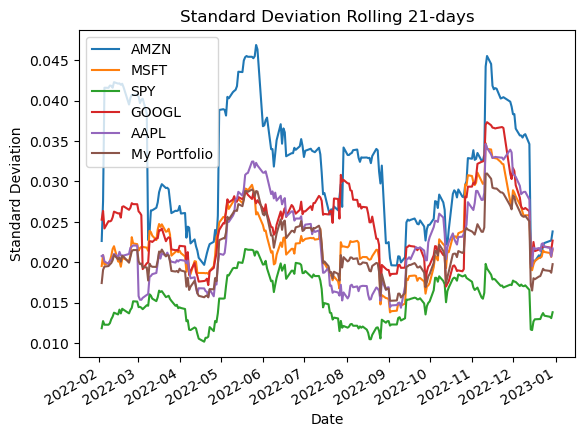

In [116]:
# Calculate rolling standard deviation
combined_portfolio_roll21 = combined_portfolio.rolling(window=21).std()
# Plot rolling standard deviation
combined_portfolio_roll21.plot(title='Standard Deviation Rolling 21-days', xlabel='Date', ylabel="Standard Deviation")

### Calculate and plot the correlation

<Axes: >

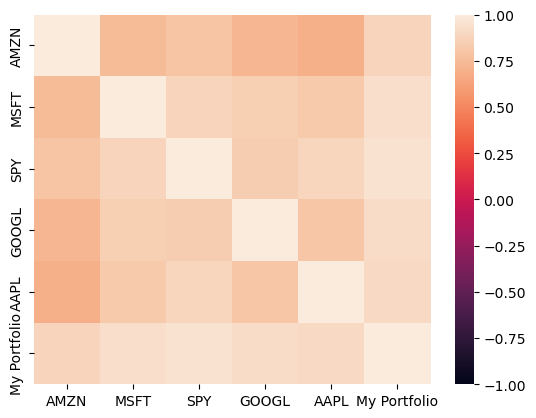

In [127]:
# Calculate and plot the correlation
combined_portfolio_corr = combined_portfolio.corr()

sns.heatmap(combined_portfolio_corr, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 30-day Beta of My Portfolio & SPY'}, xlabel='Date'>

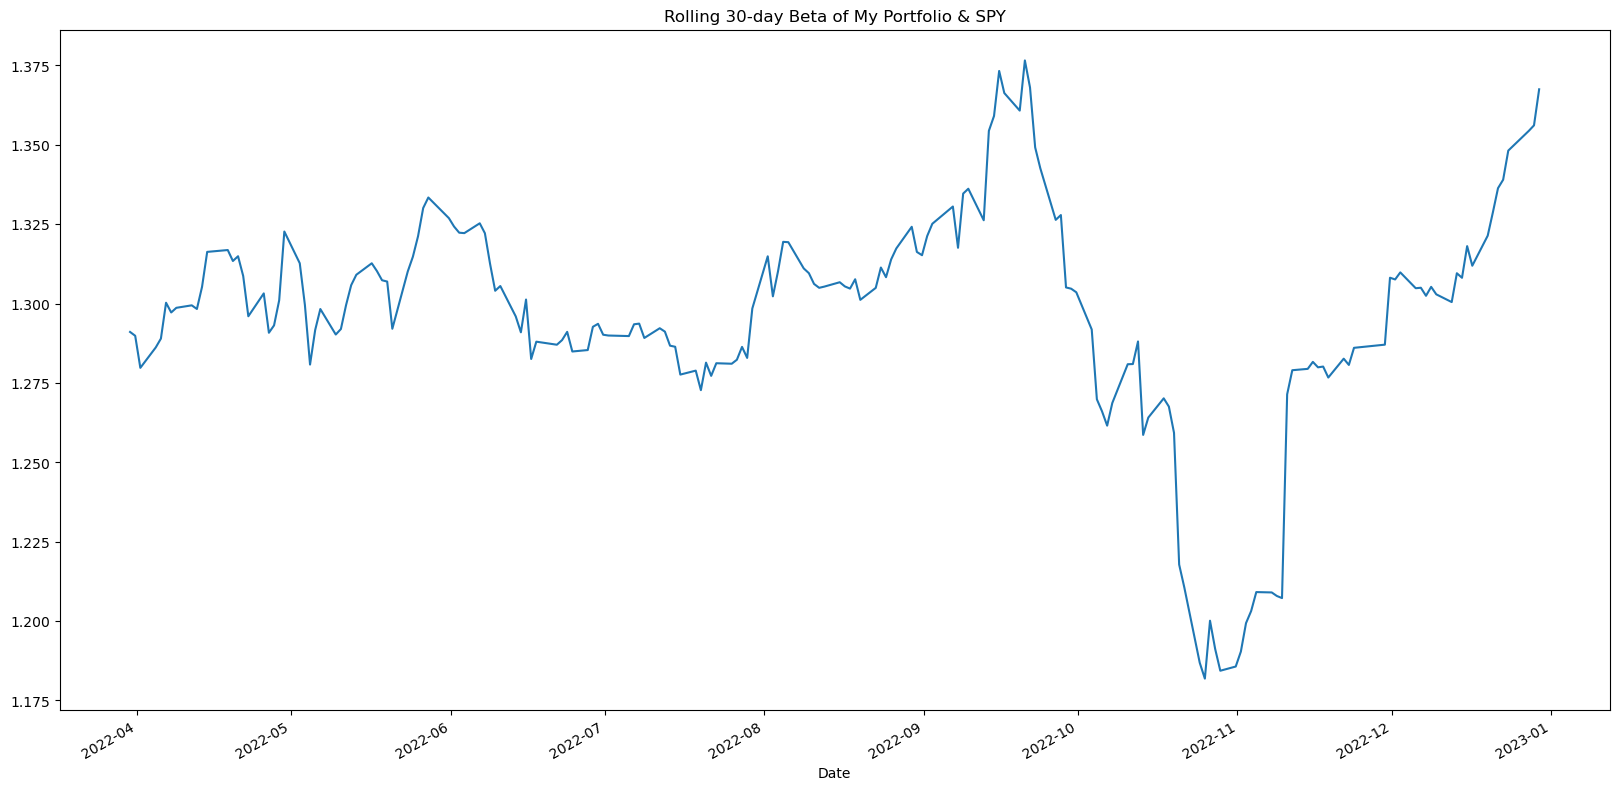

In [131]:
# Calculate and plot Beta

# covariance_1 = combined_portfolio['My Portfolio'].cov(combined_data['S&P 500 INDEX'])


# # Calculate variance of S&P 500
# variance = combined_data['S&P 500 INDEX'].var()

# # Computing beta
# my_portfolio_beta = covariance_1 / variance


rolling_covariance_1 = combined_portfolio['My Portfolio'].rolling(window=60).cov(combined_portfolio['SPY'])
rolling_variance_1 = combined_portfolio['SPY'].rolling(window=60).var()
rolling_beta_1 = rolling_covariance_1 / rolling_variance_1
rolling_beta_1.plot(figsize=(20,10), title='Rolling 30-day Beta of My Portfolio & SPY')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [132]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_1 = ((combined_portfolio.mean()-combined_portfolio['SPY'].mean()) * 252) / (combined_portfolio.std() * np.sqrt(252))
sharpe_ratios_sorted_1 = sharpe_ratios_1.sort_values(ascending=False)
sharpe_ratios_sorted_1

SPY             0.000000
MSFT           -0.216838
AAPL           -0.241922
My Portfolio   -0.469569
GOOGL          -0.597946
AMZN           -0.786966
dtype: float64

<Axes: title={'center': 'Sharpe Ratio'}>

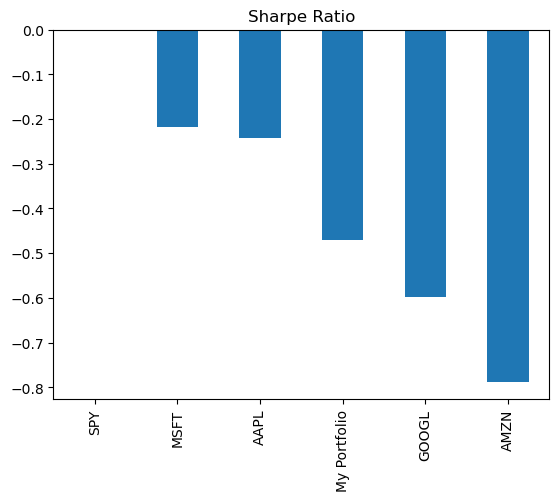

In [133]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_sorted_1.plot(kind="bar", title="Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

My portfolio did modest compared to MSFT and AAPL. The S&P500 in the 2022 did not do very well. Overall my portfolio could have done better, but these stock as very closely correlated.